In [296]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
warnings.filterwarnings('ignore')

In [297]:
company = pd.read_csv("companies.csv")
company

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,c:99940,196548,Company,99940,NaN,Webgility,webgility,/company/webgility,ecommerce,operating,...,2013-08-12,2013-08-12,2.0,5.0,NaN,2011-09-06 23:17:56,2013-08-13 00:39:13,37.774929,-122.419415,NaN
196549,c:9995,196549,Company,9995,NaN,FohBoh,fohboh,/company/fohboh,public_relations,operating,...,2013-05-01,2013-05-01,1.0,14.0,NaN,2008-08-24 15:46:26,2013-06-28 20:55:30,37.338208,-121.886329,NaN
196550,c:9996,196550,Company,9996,NaN,CSC,csc,/company/csc,consulting,operating,...,2012-01-01,2013-10-30,3.0,44.0,NaN,2008-08-24 15:46:58,2013-06-28 20:52:01,38.882334,-77.171091,NaN
196551,c:9997,196551,Company,9997,NaN,Top-candidate,top candidate,/company/top-candidate,search,operating,...,NaN,NaN,NaN,1.0,NaN,2008-08-24 16:00:22,2013-06-28 20:56:44,34.052234,-118.243685,NaN


In [298]:
company.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [299]:
company.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0.1,196553.0,9.827600e+04,5.674011e+04,0.000000,49138.000000,9.827600e+04,1.474140e+05,1.965520e+05
entity_id,196553.0,1.530062e+05,9.020925e+04,1.000000,59850.000000,1.745390e+05,2.326550e+05,2.862150e+05
parent_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
logo_width,110110.0,4.591327e+02,5.949826e+02,1.000000,192.000000,2.670000e+02,4.840000e+02,1.820000e+04
logo_height,110110.0,2.227289e+02,3.330907e+02,1.000000,70.000000,1.050000e+02,2.320000e+02,9.600000e+03
investment_rounds,2591.0,2.372057e+00,1.217351e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,4.780000e+02
invested_companies,2591.0,2.204940e+00,1.143695e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,4.590000e+02
funding_rounds,31707.0,1.659760e+00,1.201666e+00,1.000000,1.000000,1.000000e+00,2.000000e+00,1.500000e+01
funding_total_usd,27874.0,1.481652e+07,6.775937e+07,291.000000,500000.000000,2.564500e+06,1.100000e+07,5.700000e+09
milestones,91699.0,1.199402e+00,5.400989e-01,1.000000,1.000000,1.000000e+00,1.000000e+00,9.000000e+00


In [300]:
company.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

## A. Data Cleaning
    1. Delete irrelevant & redundant information
    2. Remove noise or unreliable data (missing values and outliers)
    
### 1. Delete irrelevant and redundant information
     a. Delete 'region','city','state_code' as they provide too much of granularity.
     b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by',
       'created_at', 'updated_at' as they are redundant.
     c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',           
        'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink',    
        'invested_companies' as they are irrelevant features.
     d. Delete duplicate values if any.
     e. Delete those which has more than 98% of null values.
     
### 2. Remove noise or unreliable data (missing values and outliers)
     a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
     b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.
     c. Delete contradictory (mutually opposed or inconsistent data).

#### 1.a. Delete 'region','city' as they provide too much of granularity.    

In [301]:
#Type your code here!
company.drop(['region' , 'city','state_code'], axis=1,inplace=True)
company.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


#### 1.b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.

In [302]:
#Type your code here!
company.drop(['id','Unnamed: 0.1','entity_type','entity_id','parent_id','created_by','created_at','updated_at'],axis=1,inplace=True)
company.head()

,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI
0,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,http://wetpaint-inc.com,BachelrWetpaint,...,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071,15.5
1,Flektor,flektor,/company/flektor,games_video,acquired,NaN,NaN,flektor.com,http://www.flektor.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.021122,-118.396467,NaN
2,There,there,/company/there,games_video,acquired,NaN,NaN,there.com,http://www.there.com,NaN,...,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525,NaN
3,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,NaN,mywebbo.com,http://www.mywebbo.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,http://themoviestreamer.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',  'short_description',    'description',  'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies' as they are irrelevant features.

In [303]:
#Type your code here!
company.drop(['domain','homepage_url','twitter_username','logo_url','logo_width','logo_height','short_description','description','overview','tag_list','name','normalized_name','permalink','invested_companies'],axis=1,inplace=True)
company.head()

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI
0,web,operating,2005-10-17,NaN,USA,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071,15.5
1,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.021122,-118.396467,NaN
2,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525,NaN
3,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.d. Delete duplicate values if found any.

In [304]:
# Delete duplicate values if found any.
#Type your code here!
# checking for duplicate values
duplicates = company.duplicated().value_counts()
duplicates

False    109464
True      87089
dtype: int64

#### there are 87089 duplicate values !

In [305]:
# Since, there are duplicate values in the dataset let's see how of duplicate values are present.
#Type your code here!

In [306]:
# Let's delete all the duplicate values
#Type your code here!
company.drop_duplicates(inplace=True)

In [307]:
# check if any left
#Type your code here!
duplicates = company.duplicated().value_counts()
duplicates

False    109464
dtype: int64

#### there are no more duplicate values

#### 1.e. Delete those which has more than 98% of null values.

In [308]:
company

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI
0,web,operating,2005-10-17,NaN,USA,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071,15.5
1,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.021122,-118.396467,NaN
2,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525,NaN
3,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,5.0,37.774929,-122.419415,NaN
196549,public_relations,operating,2007-11-01,NaN,USA,NaN,NaN,NaN,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329,NaN
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,44.0,38.882334,-77.171091,NaN
196551,search,operating,2008-07-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685,NaN


In [309]:
# # Since we can see only nan values so et's check how much of ros has nan values.
#Type your code here!
# calculating the percentage of missing values in each columns
company.isnull().mean().to_frame()*100

,0
category_code,11.172623
status,0.000000
founded_at,24.586165
closed_at,97.607433
country_code,22.719798
first_investment_at,97.947270
last_investment_at,97.947270
investment_rounds,97.943616
first_funding_at,71.248995
last_funding_at,71.248995


In [310]:
# # Since we can see it has more than 96% of null values, it would not make sense to impute these data. So, lets drop it.
#Type your code here!
# droping columns with more than 96% of null values
for col in company.columns:
    if(company[col].isnull().mean() > 0.977):
        company.drop(col , axis=1 , inplace=True)
company.drop(['first_milestone_at','last_milestone_at','first_funding_at','last_funding_at'], axis=1, inplace=True)
company.head()

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
0,web,operating,2005-10-17,NaN,USA,3.0,39750000.0,5.0,17.0,47.606209,-122.332071
1,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,6.0,34.021122,-118.396467
2,games_video,acquired,NaN,NaN,USA,NaN,NaN,4.0,12.0,37.562992,-122.325525
3,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2.a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
    (Since these are the type of data where adding value via imputation will create wrong pattern only)

In [311]:
#Type your code here!
company.dropna(subset='status',inplace=True)
company

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
0,web,operating,2005-10-17,NaN,USA,3.0,39750000.0,5.0,17.0,47.606209,-122.332071
1,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,6.0,34.021122,-118.396467
2,games_video,acquired,NaN,NaN,USA,NaN,NaN,4.0,12.0,37.562992,-122.325525
3,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,NaN,USA,1.0,750000.0,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008-07-01,NaN,USA,NaN,NaN,NaN,1.0,34.052234,-118.243685


In [312]:
#Type your code here!
company.dropna(subset='country_code',inplace=True)
company

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
0,web,operating,2005-10-17,NaN,USA,3.0,39750000.0,5.0,17.0,47.606209,-122.332071
1,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,6.0,34.021122,-118.396467
2,games_video,acquired,NaN,NaN,USA,NaN,NaN,4.0,12.0,37.562992,-122.325525
5,advertising,operating,2007-06-27,NaN,MAR,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008-08-20,NaN,IND,NaN,NaN,NaN,NaN,22.307159,73.181219
...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,NaN,USA,1.0,750000.0,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008-07-01,NaN,USA,NaN,NaN,NaN,1.0,34.052234,-118.243685


In [313]:
#Type your code here!
company.dropna(subset='category_code',inplace=True)
company

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
0,web,operating,2005-10-17,NaN,USA,3.0,39750000.0,5.0,17.0,47.606209,-122.332071
1,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,6.0,34.021122,-118.396467
2,games_video,acquired,NaN,NaN,USA,NaN,NaN,4.0,12.0,37.562992,-122.325525
5,advertising,operating,2007-06-27,NaN,MAR,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008-08-20,NaN,IND,NaN,NaN,NaN,NaN,22.307159,73.181219
...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,NaN,USA,1.0,750000.0,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008-07-01,NaN,USA,NaN,NaN,NaN,1.0,34.052234,-118.243685


In [314]:
#Type your code here!
company.dropna(subset='founded_at',inplace=True)
company

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
0,web,operating,2005-10-17,NaN,USA,3.0,39750000.0,5.0,17.0,47.606209,-122.332071
5,advertising,operating,2007-06-27,NaN,MAR,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008-08-20,NaN,IND,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008-08-01,NaN,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007-10-01,NaN,USA,1.0,5000000.0,3.0,14.0,37.386052,-122.083851
...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,NaN,USA,1.0,750000.0,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008-07-01,NaN,USA,NaN,NaN,NaN,1.0,34.052234,-118.243685


In [315]:
# Since we can see only nan values so et's check how much of rows has nan values.
#Type your code here!
# calculating the number of rows having null values
rows= company.shape[0] - company.dropna().shape[0]
rows

62937

#### 62937 rows still have at least 1 nan value !!

In [316]:
company

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
0,web,operating,2005-10-17,NaN,USA,3.0,39750000.0,5.0,17.0,47.606209,-122.332071
5,advertising,operating,2007-06-27,NaN,MAR,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008-08-20,NaN,IND,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008-08-01,NaN,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007-10-01,NaN,USA,1.0,5000000.0,3.0,14.0,37.386052,-122.083851
...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,NaN,USA,1.0,750000.0,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008-07-01,NaN,USA,NaN,NaN,NaN,1.0,34.052234,-118.243685


#### 2.b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.

<AxesSubplot:xlabel='funding_total_usd'>

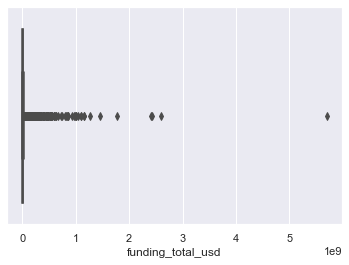

In [317]:
#Type your code here!
sns.boxplot(x=company.funding_total_usd)

#### There are a lot of outliers in 'funding_total_usd' column!

<AxesSubplot:xlabel='funding_rounds'>

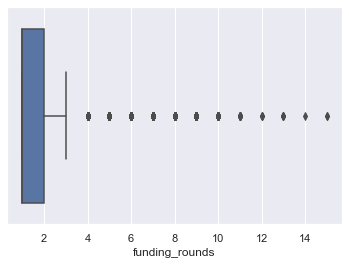

In [318]:
#Type your code here!
sns.boxplot(x=company.funding_rounds)

### Summary:
If you can see the outlier in both 'funding_total_usd' and 'funding_rounds'. So, let's find them and drop it.

    1. Find the IQR (Interquartile Range)
    2. Find the upper and lower limit
    3. Find outliers
    4. Drop them
    5. Compare the plots after trimming 


#### 2.b.1. Find the IQR

In [319]:
# For funding_total_usd
#Type your code here!
funding_total_q25 , funding_total_q75 = np.percentile(company.funding_total_usd.dropna() , [25,75])
funding_total_usd_iqr = funding_total_q75 - funding_total_q25
print(funding_total_usd_iqr)
# For funding_rounds
#Type your code here!
funding_rounds_q25 , funding_rounds_q75 = np.percentile(company.funding_rounds.dropna() , [25,75])
funding_rounds_iqr = funding_rounds_q75 - funding_rounds_q25
print(funding_rounds_iqr)

11488962.0
1.0


#### 2.b.1. Find the Upper and Lower limit

In [320]:
# For funding_total_usd
#Type your code here!
funding_total_lower = funding_total_q25 - (1.5*funding_total_usd_iqr)
funding_total_upper = funding_total_q75 + (1.5*funding_total_usd_iqr)
print(funding_total_upper)
# For funding_rounds
#Type your code here!
funding_rounds_lower = funding_rounds_q25 - (1.5*funding_rounds_iqr)
funding_rounds_upper = funding_rounds_q75 + (1.5*funding_rounds_iqr)
print(funding_rounds_upper)

29233443.0
3.5


#### 2.b.1.  Find outliers

In [321]:
# For funding_total_usd
#Type your code here!
# i will only use the upper limit as the box plots shows that there are no outliers smaller than the lower limit
funding_total_outliers = [f for f in company.funding_total_usd if f > funding_total_upper]
print(len(funding_total_outliers))
# For funding_rounds
#Type your code here!
funding_rounds_outliers = [x for x in company.funding_rounds if x > funding_rounds_upper]
print(len(funding_rounds_outliers))

2561
2182


#### the two columns has a lot of outliers !!!

#### 2.b.1. Drop the outliers

In [322]:
# For funding_total_usd
#Type your code here!
filter1 = (company['funding_total_usd']<funding_total_lower)
filter2 = (company['funding_total_usd']>funding_total_upper)
company.drop(company[filter1 | filter2].index, inplace=True)
# For funding_rounds
#Type your code here!
filter3 = (company['funding_rounds']<funding_rounds_lower)
filter4 = (company['funding_rounds']>funding_rounds_upper)
company.drop(company[filter3 | filter4].index, inplace=True)
   

In [323]:
company

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
5,advertising,operating,2007-06-27,NaN,MAR,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008-08-20,NaN,IND,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008-08-01,NaN,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007-10-01,NaN,USA,1.0,5000000.0,3.0,14.0,37.386052,-122.083851
15,games_video,operating,2008-01-01,NaN,USA,NaN,NaN,1.0,3.0,33.078655,-116.601964
...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,NaN,USA,1.0,750000.0,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008-07-01,NaN,USA,NaN,NaN,NaN,1.0,34.052234,-118.243685


<AxesSubplot:xlabel='funding_total_usd'>

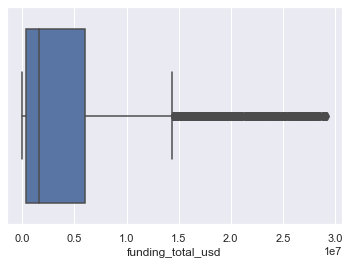

In [324]:
sns.boxplot(x=company.funding_total_usd)

<AxesSubplot:xlabel='funding_rounds'>

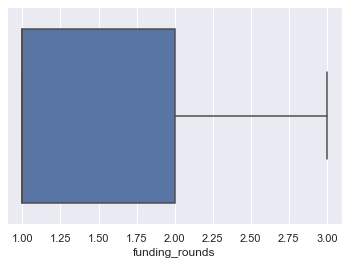

In [325]:
sns.boxplot(x=company.funding_rounds)

#### 2.c. Delete contradictory (mutually opposed or inconsistent data).


In [326]:
# Since we have not imputed the datasets in closed_at yet, we will check it later on.

# B. Date Transformation
    It can be divided into two successive phases.
   ## 1. Changes in original data
        a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at ,
           last_milestone_at to years.
        b. Generalize the categorical data i.e. category_code, status and category_code.
   ## 2. Create new variables
        a. Create new feature isClosed from closed_at and status.
        b. Create new feature 'active_days'

#### 1.a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at , last_milestone_at to years.

In [327]:
# For founded_at
#Type your code here!
company['founded_at'] = pd.to_datetime(company['founded_at'] , format="%Y-%m-%d")
company['founded_at'] = company['founded_at'].dt.year
# closed_at
#Type your code here!
company['closed_at'] = pd.to_datetime(company['closed_at'] , format="%Y-%m-%d")
company['closed_at'] = company['closed_at'].dt.year
# # # first_funding_at
# #Type your code here!
# company['first_funding_at'] = pd.to_datetime(company['first_funding_at'] , format="%Y-%m-%d")
# company['first_funding_at'] = company['first_funding_at'].dt.year
# # # last_funding_at
# #Type your code here!
# company['last_funding_at'] = pd.to_datetime(company['last_funding_at'] , format="%Y-%m-%d")
# company['last_funding_at'] = company['last_funding_at'].dt.year
# # # first_milestone_at
# #Type your code here!
# company['first_milestone_at'] = pd.to_datetime(company['first_milestone_at'] , format="%Y-%m-%d")
# company['first_milestone_at'] = company['first_milestone_at'].dt.year
# # # last_milestone_at
# #Type your code here!
# company['last_milestone_at'] = pd.to_datetime(company['last_milestone_at'] , format="%Y-%m-%d")
# company['last_milestone_at'] = company['last_milestone_at'].dt.year
company

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
5,advertising,operating,2007,NaN,MAR,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008,NaN,IND,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008,NaN,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007,NaN,USA,1.0,5000000.0,3.0,14.0,37.386052,-122.083851
15,games_video,operating,2008,NaN,USA,NaN,NaN,1.0,3.0,33.078655,-116.601964
...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007,NaN,USA,NaN,NaN,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007,NaN,USA,1.0,750000.0,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959,NaN,USA,NaN,NaN,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008,NaN,USA,NaN,NaN,NaN,1.0,34.052234,-118.243685


 #### 1.b. Generalize the categorical data i.e. category_code and  country_code 

In [328]:
# 1. category_code
#Type your code here!
len(company.category_code.unique().tolist())

42

In [329]:
# Since there are 42 categories, one-hot encoding which is going to create a lot of columns so
# Lets Check the repetition of value in ascending order and keep the first 15 values and name 
# remaining one as other.

#Type your code here!
company.category_code.value_counts(ascending=False)

software            10888
web                  7752
ecommerce            4831
other                4700
mobile               3700
advertising          3575
games_video          2789
consulting           2780
enterprise           2472
biotech              2006
public_relations     1561
hardware             1434
network_hosting      1254
education            1149
search                976
cleantech             798
analytics             646
social                645
finance               638
security              612
health                601
legal                 362
medical               361
semiconductor         360
travel                330
news                  282
manufacturing         276
fashion               271
hospitality           267
real_estate           220
local                 197
photo_video           196
messaging             180
music                 179
sports                165
transportation        126
nonprofit             114
design                106
automotive  

In [330]:
# Lets keep the category as same of it falls under above 10 otherwise let's replace it with other.

#Type your code here!
to_be_replaced = company.category_code.value_counts(ascending=False).to_frame()[15:]
for category in to_be_replaced.index.to_list():
    company.replace({'category_code' : {category : 'other'}} , inplace=True)


In [331]:
#Type your code here!
company.category_code.value_counts().to_frame()

,category_code
other,12820
software,10888
web,7752
ecommerce,4831
mobile,3700
advertising,3575
games_video,2789
consulting,2780
enterprise,2472
biotech,2006


In [332]:
# Let's check if we've more than 15 columns
#Type your code here!
len(company.category_code.unique().tolist())

15

#### we have 15 unique values of category_code as we kept the first 14 and replaced all other values with 'other'

In [333]:
# One-hot encoding to category_code
#Type your code here!
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
oh_category = pd.DataFrame(encoder.fit_transform(company[['category_code']]))
oh_category.index = company.index
oh_category.columns = sorted(company.category_code.unique().tolist())
oh_category

,advertising,biotech,consulting,ecommerce,education,enterprise,games_video,hardware,mobile,network_hosting,other,public_relations,search,software,web
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
196550,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [334]:
# Concatenate category with company dataset
#Type your code here!
company = pd.concat([company , oh_category], axis=1)
company


,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,...,enterprise,games_video,hardware,mobile,network_hosting,other,public_relations,search,software,web
5,advertising,operating,2007,NaN,MAR,NaN,NaN,NaN,2.0,30.427755,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,other,operating,2008,NaN,IND,NaN,NaN,NaN,NaN,22.307159,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12,advertising,operating,2008,NaN,USA,NaN,NaN,1.0,2.0,35.686975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,web,acquired,2007,NaN,USA,1.0,5000000.0,3.0,14.0,37.386052,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15,games_video,operating,2008,NaN,USA,NaN,NaN,1.0,3.0,33.078655,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007,NaN,USA,NaN,NaN,2.0,5.0,37.774929,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196549,public_relations,operating,2007,NaN,USA,1.0,750000.0,1.0,14.0,37.338208,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
196550,consulting,operating,1959,NaN,USA,NaN,NaN,3.0,44.0,38.882334,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196551,search,operating,2008,NaN,USA,NaN,NaN,NaN,1.0,34.052234,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [335]:
# Since, We've added the encoded category_columns, let's delete original category_code
#Type your code here!
company.drop('category_code' , axis=1 , inplace=True)
company

,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,...,enterprise,games_video,hardware,mobile,network_hosting,other,public_relations,search,software,web
5,operating,2007,NaN,MAR,NaN,NaN,NaN,2.0,30.427755,-9.598107,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,operating,2008,NaN,IND,NaN,NaN,NaN,NaN,22.307159,73.181219,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12,operating,2008,NaN,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,acquired,2007,NaN,USA,1.0,5000000.0,3.0,14.0,37.386052,-122.083851,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15,operating,2008,NaN,USA,NaN,NaN,1.0,3.0,33.078655,-116.601964,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,operating,2007,NaN,USA,NaN,NaN,2.0,5.0,37.774929,-122.419415,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196549,operating,2007,NaN,USA,1.0,750000.0,1.0,14.0,37.338208,-121.886329,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
196550,operating,1959,NaN,USA,NaN,NaN,3.0,44.0,38.882334,-77.171091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196551,operating,2008,NaN,USA,NaN,NaN,NaN,1.0,34.052234,-118.243685,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Let's encode 'country' column now.

In [336]:
# 1. country_code
#Type your code here!
len(company.country_code.unique().tolist())

165

In [337]:

# Since there are 161 categories, one-hot encoding which is going to create a lot of columns so
# Lets Check the repetition of value in ascending order and keep the first 10 values and name 
# remaining one as other.

#Type your code here!
company.country_code.value_counts(ascending=False)

USA    33844
GBR     4959
IND     2985
CAN     2609
DEU     1358
       ...  
MDG        1
NAM        1
TTO        1
VCT        1
SDN        1
Name: country_code, Length: 165, dtype: int64

In [338]:
# Lets keep the country as same of it falls under above 10 otherwise let's replaceit with other.
#Type your code here!
to_be_replaced = company.country_code.value_counts(ascending=False).to_frame()[10:]
for country in to_be_replaced.index.to_list():
    company.replace({'country_code' : {country : 'other_country'}} , inplace=True)

In [339]:
#Type your code here!
company.country_code.value_counts().to_frame()

,country_code
USA,33844
other_country,9682
GBR,4959
IND,2985
CAN,2609
DEU,1358
FRA,1226
AUS,1027
ESP,880
ISR,764


In [340]:
#Type your code here!
len(company.country_code.unique().tolist())

11

In [341]:
# One-hot encoding to category_code
#Type your code here!
cc_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
oh_country = pd.DataFrame(cc_encoder.fit_transform(company[['country_code']]))
oh_country.index = company.index
oh_country.columns = sorted(company.country_code.unique().tolist())
oh_country

,AUS,CAN,DEU,ESP,FRA,GBR,IND,ISR,NLD,USA,other_country
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
196548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
196549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
196550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
196551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [342]:
# Concatenate category with company dataset
#Type your code here!
company = pd.concat([company , oh_country], axis=1)
company


,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,...,CAN,DEU,ESP,FRA,GBR,IND,ISR,NLD,USA,other_country
5,operating,2007,NaN,other_country,NaN,NaN,NaN,2.0,30.427755,-9.598107,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,operating,2008,NaN,IND,NaN,NaN,NaN,NaN,22.307159,73.181219,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12,operating,2008,NaN,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13,acquired,2007,NaN,USA,1.0,5000000.0,3.0,14.0,37.386052,-122.083851,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15,operating,2008,NaN,USA,NaN,NaN,1.0,3.0,33.078655,-116.601964,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,operating,2007,NaN,USA,NaN,NaN,2.0,5.0,37.774929,-122.419415,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
196549,operating,2007,NaN,USA,1.0,750000.0,1.0,14.0,37.338208,-121.886329,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
196550,operating,1959,NaN,USA,NaN,NaN,3.0,44.0,38.882334,-77.171091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
196551,operating,2008,NaN,USA,NaN,NaN,NaN,1.0,34.052234,-118.243685,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [343]:
# Since, We've added the encoded country_code , let's delete original category_code
#Type your code here!
company.drop('country_code' , axis=1 , inplace=True)
company

,status,founded_at,closed_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,advertising,...,CAN,DEU,ESP,FRA,GBR,IND,ISR,NLD,USA,other_country
5,operating,2007,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,operating,2008,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12,operating,2008,NaN,NaN,NaN,1.0,2.0,35.686975,-105.937799,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13,acquired,2007,NaN,1.0,5000000.0,3.0,14.0,37.386052,-122.083851,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15,operating,2008,NaN,NaN,NaN,1.0,3.0,33.078655,-116.601964,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,operating,2007,NaN,NaN,NaN,2.0,5.0,37.774929,-122.419415,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
196549,operating,2007,NaN,1.0,750000.0,1.0,14.0,37.338208,-121.886329,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
196550,operating,1959,NaN,NaN,NaN,3.0,44.0,38.882334,-77.171091,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
196551,operating,2008,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 2. Create new variables¶
    a. Create new feature isClosed from closed_at and status.
    b. Create new feature 'active_days'

#### 2.a. Create new feature isClosed from closed_at and status.
     - if the value in status is 'operating' or 'ipo', Let's put 1.
     - Where as if the value is 'acquired' or 'closed', let's put 0.

In [344]:
#Type your code here!
values = []
for s in company.status:
    if s == 'operating' or s == 'ipo':
        values.append(1)
    else:
        values.append(0)

In [345]:
#Type your code here!
company['isClosed'] = values

In [346]:
#Type your code here!
company

,status,founded_at,closed_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,advertising,...,DEU,ESP,FRA,GBR,IND,ISR,NLD,USA,other_country,isClosed
5,operating,2007,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
6,operating,2008,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
12,operating,2008,NaN,NaN,NaN,1.0,2.0,35.686975,-105.937799,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
13,acquired,2007,NaN,1.0,5000000.0,3.0,14.0,37.386052,-122.083851,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
15,operating,2008,NaN,NaN,NaN,1.0,3.0,33.078655,-116.601964,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,operating,2007,NaN,NaN,NaN,2.0,5.0,37.774929,-122.419415,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
196549,operating,2007,NaN,1.0,750000.0,1.0,14.0,37.338208,-121.886329,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
196550,operating,1959,NaN,NaN,NaN,3.0,44.0,38.882334,-77.171091,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
196551,operating,2008,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [347]:
company.closed_at.unique()

array([  nan, 2010., 2012., 2013., 2009., 2011., 2008., 2001., 2006.,
       1963., 1991., 2005., 2007., 1998., 2004., 1997., 2000.])

#### 2.b. Create active_days
     i. Replacing values:
         -  if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
         - Where as if the value is 'acquired' or 'closed', let's put 0.
     ii. Subtract founded_date from closed_date, and calculate age in days (After calculating active days, 
         check contradictory issues we didn't check it before).
     iii. Then, delete the closed_at column.

In [348]:
#Type your code here!
for s in company.index:
    if company.loc[s , 'status'] == 'operating' or company.loc[s , 'status'] == 'ipo':
        company.loc[s , 'closed_at'] = 2021
company.closed_at.fillna(0,inplace=True)

##### 2.b.i  Replacing the values in closed_at column
   - if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
   - Where as if the value is 'acquired' or 'closed', let's put 0.

In [349]:
#Type your code here!

In [350]:
#Type your code here!
company

,status,founded_at,closed_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,advertising,...,DEU,ESP,FRA,GBR,IND,ISR,NLD,USA,other_country,isClosed
5,operating,2007,2021.0,NaN,NaN,NaN,2.0,30.427755,-9.598107,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
6,operating,2008,2021.0,NaN,NaN,NaN,NaN,22.307159,73.181219,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
12,operating,2008,2021.0,NaN,NaN,1.0,2.0,35.686975,-105.937799,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
13,acquired,2007,0.0,1.0,5000000.0,3.0,14.0,37.386052,-122.083851,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
15,operating,2008,2021.0,NaN,NaN,1.0,3.0,33.078655,-116.601964,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,operating,2007,2021.0,NaN,NaN,2.0,5.0,37.774929,-122.419415,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
196549,operating,2007,2021.0,1.0,750000.0,1.0,14.0,37.338208,-121.886329,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
196550,operating,1959,2021.0,NaN,NaN,3.0,44.0,38.882334,-77.171091,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
196551,operating,2008,2021.0,NaN,NaN,NaN,1.0,34.052234,-118.243685,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [351]:
#Type your code here!
company.closed_at.unique()

array([2021.,    0., 2010., 2012., 2013., 2009., 2011., 2008., 2001.,
       2006., 1963., 1991., 2005., 2007., 1998., 2004., 1997., 2000.])

##### 2.b.ii Subtract founded_date from closed_date, and calculate age in days (After calculating active days, check contradictory issues we didn't check it before.)

In [352]:
#Type your code here!
company['active_days'] = (company['closed_at'] - company['founded_at'])*365
company

,status,founded_at,closed_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,advertising,...,ESP,FRA,GBR,IND,ISR,NLD,USA,other_country,isClosed,active_days
5,operating,2007,2021.0,NaN,NaN,NaN,2.0,30.427755,-9.598107,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5110.0
6,operating,2008,2021.0,NaN,NaN,NaN,NaN,22.307159,73.181219,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,4745.0
12,operating,2008,2021.0,NaN,NaN,1.0,2.0,35.686975,-105.937799,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4745.0
13,acquired,2007,0.0,1.0,5000000.0,3.0,14.0,37.386052,-122.083851,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,-732555.0
15,operating,2008,2021.0,NaN,NaN,1.0,3.0,33.078655,-116.601964,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4745.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,operating,2007,2021.0,NaN,NaN,2.0,5.0,37.774929,-122.419415,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5110.0
196549,operating,2007,2021.0,1.0,750000.0,1.0,14.0,37.338208,-121.886329,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5110.0
196550,operating,1959,2021.0,NaN,NaN,3.0,44.0,38.882334,-77.171091,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,22630.0
196551,operating,2008,2021.0,NaN,NaN,NaN,1.0,34.052234,-118.243685,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4745.0


In [353]:
# changing active days of closed and acquired companies to 0 instead of negative value
company = company.set_index('status')
company = company.reset_index()
for ind in company.index:
    if company.loc[ind , 'active_days'] < 0:
        company.loc[ind , 'active_days'] = 0
company

,status,founded_at,closed_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,advertising,...,ESP,FRA,GBR,IND,ISR,NLD,USA,other_country,isClosed,active_days
0,operating,2007,2021.0,NaN,NaN,NaN,2.0,30.427755,-9.598107,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5110.0
1,operating,2008,2021.0,NaN,NaN,NaN,NaN,22.307159,73.181219,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,4745.0
2,operating,2008,2021.0,NaN,NaN,1.0,2.0,35.686975,-105.937799,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4745.0
3,acquired,2007,0.0,1.0,5000000.0,3.0,14.0,37.386052,-122.083851,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0
4,operating,2008,2021.0,NaN,NaN,1.0,3.0,33.078655,-116.601964,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4745.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59982,operating,2007,2021.0,NaN,NaN,2.0,5.0,37.774929,-122.419415,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5110.0
59983,operating,2007,2021.0,1.0,750000.0,1.0,14.0,37.338208,-121.886329,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5110.0
59984,operating,1959,2021.0,NaN,NaN,3.0,44.0,38.882334,-77.171091,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,22630.0
59985,operating,2008,2021.0,NaN,NaN,NaN,1.0,34.052234,-118.243685,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4745.0


#### 2.b.iii. Then, delete the closed_at column.

In [354]:
#Type your code here!
company.drop('closed_at' , axis=1 ,inplace=True)
company

,status,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,advertising,biotech,...,ESP,FRA,GBR,IND,ISR,NLD,USA,other_country,isClosed,active_days
0,operating,2007,NaN,NaN,NaN,2.0,30.427755,-9.598107,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5110.0
1,operating,2008,NaN,NaN,NaN,NaN,22.307159,73.181219,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,4745.0
2,operating,2008,NaN,NaN,1.0,2.0,35.686975,-105.937799,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4745.0
3,acquired,2007,1.0,5000000.0,3.0,14.0,37.386052,-122.083851,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0
4,operating,2008,NaN,NaN,1.0,3.0,33.078655,-116.601964,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4745.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59982,operating,2007,NaN,NaN,2.0,5.0,37.774929,-122.419415,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5110.0
59983,operating,2007,1.0,750000.0,1.0,14.0,37.338208,-121.886329,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5110.0
59984,operating,1959,NaN,NaN,3.0,44.0,38.882334,-77.171091,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,22630.0
59985,operating,2008,NaN,NaN,NaN,1.0,34.052234,-118.243685,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4745.0


### Let's work on target variabe now.

In [355]:
#Type your code here!

In [356]:
#Type your code here!
company = company.set_index('status')
company = company.reset_index()
for ind in company.index:
    if company.loc[ind , 'status'] == 'operating':
        company.loc[ind , 'status'] = 1
    elif company.loc[ind , 'status'] == 'acquired':
        company.loc[ind , 'status'] = 2
    elif company.loc[ind , 'status'] == 'closed':
        company.loc[ind , 'status'] = 3
    else: 
        company.loc[ind , 'status'] = 4

In [357]:
#Type your code here!
company

,status,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,advertising,biotech,...,ESP,FRA,GBR,IND,ISR,NLD,USA,other_country,isClosed,active_days
0,1,2007,NaN,NaN,NaN,2.0,30.427755,-9.598107,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5110.0
1,1,2008,NaN,NaN,NaN,NaN,22.307159,73.181219,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,4745.0
2,1,2008,NaN,NaN,1.0,2.0,35.686975,-105.937799,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4745.0
3,2,2007,1.0,5000000.0,3.0,14.0,37.386052,-122.083851,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0
4,1,2008,NaN,NaN,1.0,3.0,33.078655,-116.601964,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4745.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59982,1,2007,NaN,NaN,2.0,5.0,37.774929,-122.419415,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5110.0
59983,1,2007,1.0,750000.0,1.0,14.0,37.338208,-121.886329,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5110.0
59984,1,1959,NaN,NaN,3.0,44.0,38.882334,-77.171091,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,22630.0
59985,1,2008,NaN,NaN,NaN,1.0,34.052234,-118.243685,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4745.0


In [358]:
#Type your code here!
company.status.value_counts()

1    54539
2     3488
3     1518
4      442
Name: status, dtype: int64

### Remove the null vaues with the mean value in 'Numerical Data'

In [359]:
company

,status,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,advertising,biotech,...,ESP,FRA,GBR,IND,ISR,NLD,USA,other_country,isClosed,active_days
0,1,2007,NaN,NaN,NaN,2.0,30.427755,-9.598107,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5110.0
1,1,2008,NaN,NaN,NaN,NaN,22.307159,73.181219,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,4745.0
2,1,2008,NaN,NaN,1.0,2.0,35.686975,-105.937799,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4745.0
3,2,2007,1.0,5000000.0,3.0,14.0,37.386052,-122.083851,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0
4,1,2008,NaN,NaN,1.0,3.0,33.078655,-116.601964,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4745.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59982,1,2007,NaN,NaN,2.0,5.0,37.774929,-122.419415,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5110.0
59983,1,2007,1.0,750000.0,1.0,14.0,37.338208,-121.886329,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5110.0
59984,1,1959,NaN,NaN,3.0,44.0,38.882334,-77.171091,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,22630.0
59985,1,2008,NaN,NaN,NaN,1.0,34.052234,-118.243685,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4745.0


In [360]:
#Type your code here!
import math
company['funding_rounds'].fillna(math.ceil(company['funding_rounds'].mean()) , inplace=True)
company['funding_total_usd'].fillna(math.ceil(company['funding_total_usd'].mean()) , inplace=True)
company['milestones'].fillna(math.ceil(company['milestones'].mean()) , inplace=True)

In [361]:
company

,status,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,advertising,biotech,...,ESP,FRA,GBR,IND,ISR,NLD,USA,other_country,isClosed,active_days
0,1,2007,2.0,4561781.0,2.0,2.0,30.427755,-9.598107,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5110.0
1,1,2008,2.0,4561781.0,2.0,NaN,22.307159,73.181219,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,4745.0
2,1,2008,2.0,4561781.0,1.0,2.0,35.686975,-105.937799,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4745.0
3,2,2007,1.0,5000000.0,3.0,14.0,37.386052,-122.083851,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0
4,1,2008,2.0,4561781.0,1.0,3.0,33.078655,-116.601964,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4745.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59982,1,2007,2.0,4561781.0,2.0,5.0,37.774929,-122.419415,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5110.0
59983,1,2007,1.0,750000.0,1.0,14.0,37.338208,-121.886329,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5110.0
59984,1,1959,2.0,4561781.0,3.0,44.0,38.882334,-77.171091,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,22630.0
59985,1,2008,2.0,4561781.0,2.0,1.0,34.052234,-118.243685,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4745.0


In [362]:
# First let's check how much of rows has nan values and drop them.
#Type your code here!
company.isnull().sum().to_frame()

,0
status,0
founded_at,0
funding_rounds,0
funding_total_usd,0
milestones,0
relationships,15116
lat,2329
lng,2329
advertising,0
biotech,0


In [363]:
#Type your code here!
company.dropna(inplace=True)

In [364]:
#Type your code here!
company = company.set_index('status')
company = company.reset_index()
company

,status,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,advertising,biotech,...,ESP,FRA,GBR,IND,ISR,NLD,USA,other_country,isClosed,active_days
0,1,2007,2.0,4561781.0,2.0,2.0,30.427755,-9.598107,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5110.0
1,1,2008,2.0,4561781.0,1.0,2.0,35.686975,-105.937799,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4745.0
2,2,2007,1.0,5000000.0,3.0,14.0,37.386052,-122.083851,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0
3,1,2008,2.0,4561781.0,1.0,3.0,33.078655,-116.601964,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4745.0
4,2,2008,1.0,4561781.0,4.0,9.0,37.441883,-122.143019,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43356,1,2007,2.0,4561781.0,2.0,5.0,37.774929,-122.419415,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5110.0
43357,1,2007,1.0,750000.0,1.0,14.0,37.338208,-121.886329,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5110.0
43358,1,1959,2.0,4561781.0,3.0,44.0,38.882334,-77.171091,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,22630.0
43359,1,2008,2.0,4561781.0,2.0,1.0,34.052234,-118.243685,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4745.0


In [365]:
# Final null check on data
#Type your code here!
company.isnull().sum().to_frame()

,0
status,0
founded_at,0
funding_rounds,0
funding_total_usd,0
milestones,0
relationships,0
lat,0
lng,0
advertising,0
biotech,0


In [366]:
#Finally Save cleaned Data.
#Type your code here!
company.to_csv('cleaned_data.csv')